# Affichages des données

Ce notebook regroupe des tests sur l'ensemble des fonctions d'affichages

## Spectrogramme

## Spectrogramme

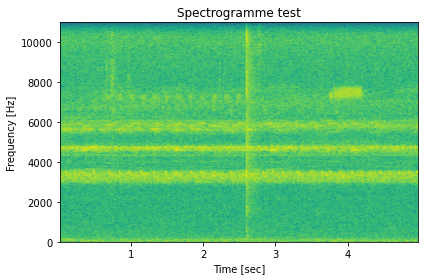

In [1]:
from affichageDonnees import displaySpectrogram
from utils import getSoundAtPosition
from matplotlib import pyplot as plt

root = './SoundDatabase'
sound, fs = getSoundAtPosition(root, 10, 5)

ax = plt.axes()
displaySpectrogram(sound, fs, "Spectrogramme test", ax)


## Représentation temporelle

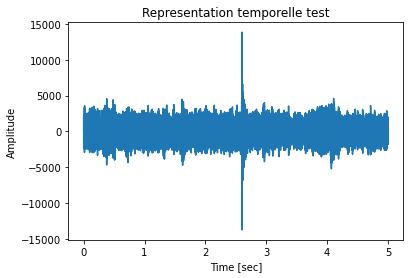

In [2]:
from affichageDonnees import displaySound
from utils import getSoundAtPosition
from matplotlib import pyplot as plt

root = './SoundDatabase'
sound, fs = getSoundAtPosition(root, 10, 5)

ax = plt.axes()
displaySound(sound, 5, fs, "Representation temporelle test", ax)

## Représentation polaire d'un échantillonnage de sons

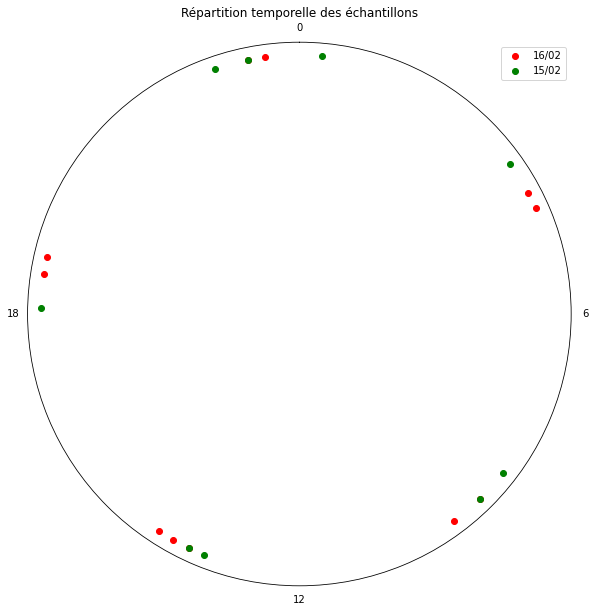

In [3]:
from affichageDonnees import displayPolarSamples
from echantillonages import sampling_pertinence

samples = sampling_pertinence(20)

displayPolarSamples(samples)

## Tracé de la pertinence

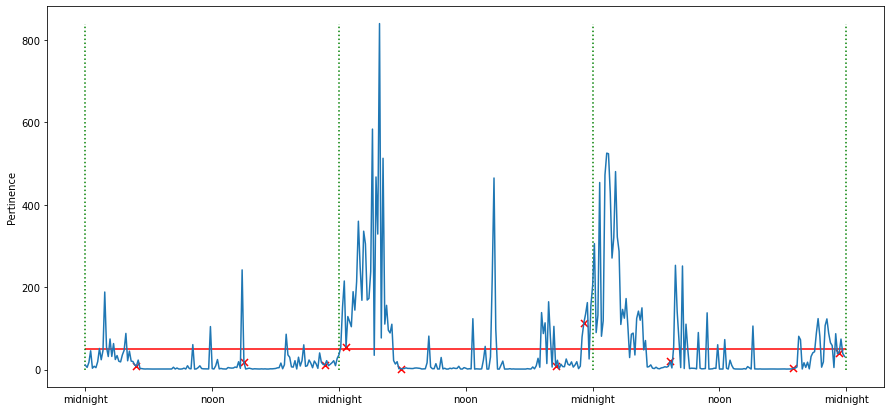

In [4]:
from affichageDonnees import displayPertinences
from echantillonages import sampling_dpp

samples = sampling_dpp(10)

displayPertinences(exagerated = True, samples = samples)

## Affichage de la matrice des similarités

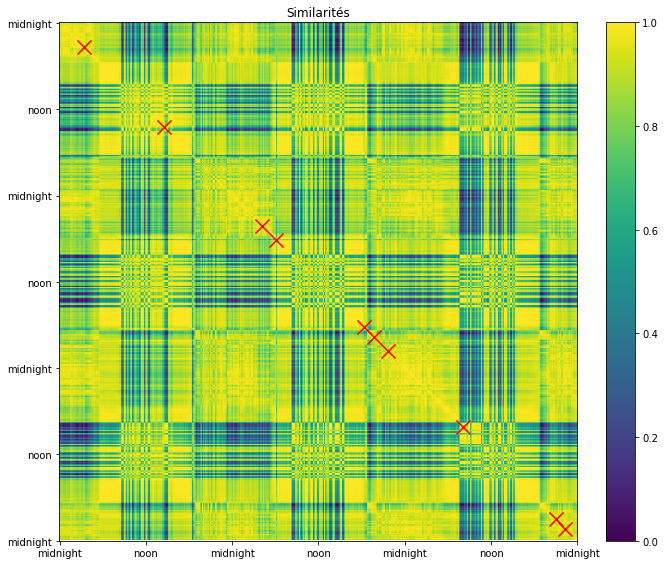

In [5]:
from affichageDonnees import displaySimilarities
from echantillonages import sampling_dpp

samples = sampling_dpp(10)

displaySimilarities(samples = samples)